# Classification with Sklearn

In this section, we will introcude how to implement claffier with sklaern.

This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.

In [2]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

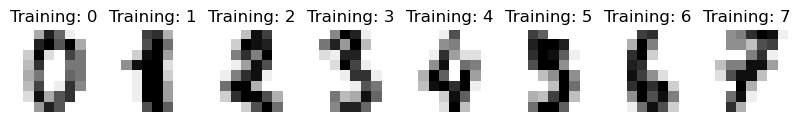

In [10]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [39]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Create a classifier: a support vector classifier
#clf = svm.SVC(gamma=0.001)

from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()


from sklearn.neighbors import KNeighborsClassifier as knn
#clf=knn()


from sklearn.tree import DecisionTreeRegressor as D_tree

#clf=D_tree()
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted digit value in the title.

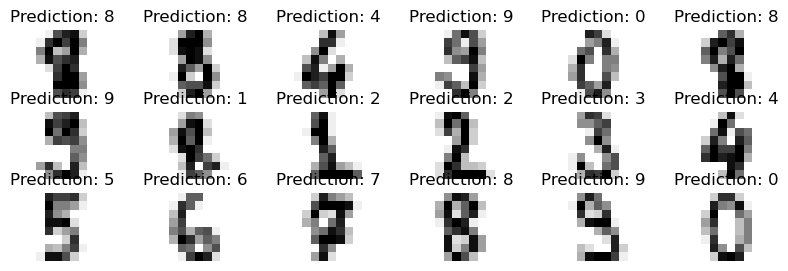

In [40]:
_, axes = plt.subplots(nrows=3, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes[0], X_test[0:6], predicted[0:6]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
for ax, image, prediction in zip(axes[1], X_test[6:12], predicted[6:12]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
for ax, image, prediction in zip(axes[2], X_test[12:18], predicted[12:18]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [13]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeRegressor():
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        88
           1       0.80      0.73      0.76        91
           2       0.74      0.73      0.74        86
           3       0.60      0.58      0.59        91
           4       0.83      0.73      0.77        92
           5       0.75      0.63      0.68        91
           6       0.89      0.85      0.87        91
           7       0.57      0.66      0.61        89
           8       0.51      0.45      0.48        88
           9       0.58      0.66      0.62        92

    accuracy                           0.70       899
   macro avg       0.70      0.70      0.70       899
weighted avg       0.70      0.70      0.70       899




We can also plot a confusion matrix of the true digit values and the predicted digit values.



Confusion matrix:
[[85  0  0  0  0  0  0  1  2  0]
 [ 3 66  2  3  5  2  1  0  4  5]
 [ 1  0 63 12  0  1  0  4  2  3]
 [ 1  5  3 53  0  4  1  4  6 14]
 [15  0  1  0 67  1  3  4  0  1]
 [ 1  1  3  4  5 57  5  8  0  7]
 [ 0  3  3  4  1  1 77  1  0  1]
 [ 0  0  1  3  3  1  0 59 12 10]
 [ 2  6  9  8  0  7  0 13 40  3]
 [ 4  2  0  1  0  2  0 10 12 61]]


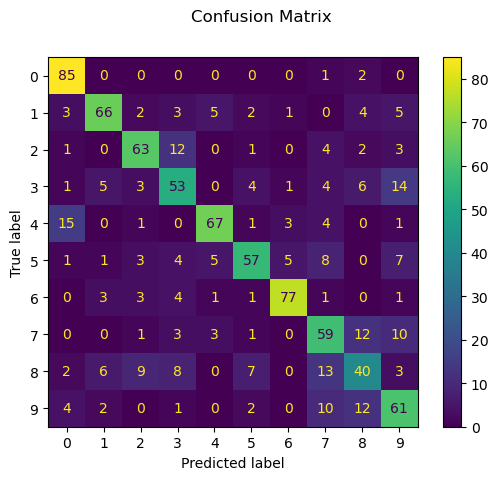

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

If the results from evaluating a classifier are stored in the form of a confusion matrix and not in terms of y_true and y_pred, one can still build a classification_report as follows:

In [7]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


